## 1)  Markdown cell: List of members and email, meeting schedule, plan



**Team Members:**

Neel Shah - nshah70@uncc.edu

Xi Lin(Linsey) xlin8@uncc.edu

Suneeth Sreedharan ssreedh1@uncc.edu

Ruchee Shorey rshorey@uncc.edu

Sindhu Preethi Gokarakonda Venkata Naga Sai - sgokarak@uncc.edu



**Communication & Collaboration:**
Whatsapp group for constant communication,
Google Meet,
Google Colab,
Google Docs,
Github

**Meeting Schedule:**
Monday, Wednesday - 6:30pm,
Saturday - Tentative

**Plan:**
The team will meet on Monday's and Wednesday's to complete a bulk of the work due that week. We have added an additional day to the schedule to meet, which will only be utilized on an as needed basis. 

## 2)  Markdown cell: Choice of data, Introduction

**Dataset:**
https://www.kaggle.com/mmattson/who-national-life-expectancy?select=who_life_exp.csv

**Data Size:** 684KB

**Attributes:** 32 columns to select from (refer to kaggle dataset for column names)

**Countries:** 183

**Years represented**: 2000-2016



**Introduction:**

Life expectancy is a statistical measure of a typical period a human being is expected to live. In the past, there have been numerous studies commenced on factors affecting life expectancy depending on various factors like demographic variables, income composition and mortality rates. It was uncovered that the effect of immunizations and the human development index was not considered in the past. The data for this project is collected from “The World Health Organization” & “United Nations website” from the period of 2000 to 2016 for 183 countries. The project relies on the accuracy of the data and will emphasize immunization factors, mortality factors, economic factors, social factors, and other health related factors. For every country, it’s much easier to find the predicting factor which is weighted lower in the value of life expectancy because factors in the dataset are built on different countries. This will help countries come up with an appropriate plan to improve the overall life expectancy of a given population.






## 3)  Markdown cell: Research Question, Relevant Domain

**Research Question:**

The main motivation for this project is predicting a country’s life expectancy. Our primary objective is to understand how immunizations, health, social and economic variables could affect this number. 

This type of information should allow governments to establish policies, regulations, and laws that could potentially enhance communities’ well-being.




**Relevant Domain:**

Life Expectancy rate of country considering various factors.

https://www.kaggle.com/mmattson/who-national-life-expectancy?select=who_life_exp.csv

https://ourworldindata.org/life-expectancy

https://population.un.org/wpp/Download/Standard/Mortality/


## 4) Combination of Markdown and Code: Data Source, Description, Basic Data Exploration - descriptive stats, info, types of features (numeric, object, etc.), null values, basic charts, outliers, skewness - look at examples from our text, datacamp and hw!


**Data Source:** The World Health Organization & United Nations website, Kaggle.

In [80]:
from google.colab import files
files.upload()


Saving who_life_exp.csv to who_life_exp (1).csv


{'who_life_exp.csv': b"country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school\nAngola,AGO,Africa,2000,47.3373,14.734000000000002,383.5583,0.137985,0.025695,1.4743899999999999,21.7,11.0,0.5,,32.0,21.0,31.0,41.14431,,,2190.0,1.11099,1.9086,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,,\nAngola,AGO,Africa,2001,48.19789,14.959629999999999,372.3876,0.133675,0.0245,1.94025,21.8,10.9,0.5,,60.0,28.0,42.0,42.254670000000004,,,2290.0,2.04631,4.4835199999999995,16945.753,118.9,47.059,1.1,2630.0,,,67.40541999999999,\nAngola,AGO,Africa,2002,49.42569,15.2001,354.5147,0.12832000000000002,0.023260000000000003,2.07512,21.9,10.7,0.6,,59.0,22.0,47.0,43.3768,,,2690.0,1.30863,3.3294599999999996,17519.417,115.1,47.702,1.2,3180.0,,,,\nAngola,A

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import scale
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [82]:
df = pd.read_csv('who_life_exp.csv')

In [83]:
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,NaN,32.0,21.0,31.0,41.14431,NaN,NaN,2190.0,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,NaN,60.0,28.0,42.0,42.25467,NaN,NaN,2290.0,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,NaN,59.0,22.0,47.0,43.37680,NaN,NaN,2690.0,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,NaN,44.0,21.0,46.0,44.36387,NaN,NaN,2820.0,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,NaN,43.0,18.0,47.0,45.35134,0.621,NaN,3080.0,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


In [84]:
#types of features (numeric, object, etc.)
df.dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

In [85]:
#Stats Summary
df.describe(include=[np.number])

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,hospitals,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,2542.000000,3092.000000,3092.000000,3092.000000,3079.000000,1780.000000,130.000000,2429.000000,3011.000000,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.00000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,85.436271,85.540427,86.608991,86.420116,83.332011,19.866038,2.044878,13397.146974,3.122935,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.53293,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,17.099786,15.282246,14.943226,15.332160,19.255119,14.071207,5.059339,16258.593973,2.091720,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.75428,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,2.000000,16.000000,8.000000,19.000000,18.695210,0.128000,0.000000,250.000000,0.062360,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.78744,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,81.000000,79.000000,81.000000,82.000000,71.658310,6.391250,0.535162,2540.000000,1.533445,4.238797,2.195106e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.26283,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,92.000000,92.000000,93.000000,93.000000,91.994080,20.523500,1.072725,7460.000000,2.601300,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.42541,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,97.000000,96.000000,97.000000,97.000000,98.552870,30.981750,2.104830,18250.000000,4.278110,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.49498,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,99.000000,99.000000,99.000000,99.000000,100.000010,79.541000,56.446950,123860.000000,12.062730,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.05908,99.998190,14.378800


In [86]:
#overall summary of the dataframe - 32 columns and 3111 rows of data
df.info

<bound method DataFrame.info of                                country country_code  ... une_literacy  une_school
0                               Angola          AGO  ...          NaN         NaN
1                               Angola          AGO  ...     67.40542         NaN
2                               Angola          AGO  ...          NaN         NaN
3                               Angola          AGO  ...          NaN         NaN
4                               Angola          AGO  ...          NaN         NaN
...                                ...          ...  ...          ...         ...
3106  Lao People's Democratic Republic          LAO  ...          NaN         NaN
3107  Lao People's Democratic Republic          LAO  ...          NaN         NaN
3108  Lao People's Democratic Republic          LAO  ...          NaN         NaN
3109  Lao People's Democratic Republic          LAO  ...     84.66104         NaN
3110  Lao People's Democratic Republic          LAO  ...          

In [87]:
#Null Values by %
df.isnull().sum()/ len(df) * 100

country             0.000000
country_code        0.000000
region              0.000000
year                0.000000
life_expect         0.000000
life_exp60          0.000000
adult_mortality     0.000000
infant_mort         0.000000
age1-4mort          0.000000
alcohol             1.607200
bmi                 1.092896
age5-19thinness     1.092896
age5-19obesity      1.092896
hepatitis          18.289939
measles             0.610736
polio               0.610736
diphtheria          0.610736
basic_water         1.028608
doctors            42.783671
hospitals          95.821279
gni_capita         21.922212
gghe-d              3.214401
che_gdp             3.760849
une_pop             1.189328
une_infant          0.000000
une_life            0.000000
une_hiv            23.818708
une_gni             3.760849
une_poverty        70.652523
une_edu_spend      41.337191
une_literacy       81.645773
une_school         74.124076
dtype: float64

In [88]:
#Percentage of missing values in each column
#Source: https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset/51071037

def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))



In [89]:
nulls_breakdown()

[iloc = 9] alcohol has 50 null values: 1.61% null
[iloc = 10] bmi has 34 null values: 1.09% null
[iloc = 11] age5-19thinness has 34 null values: 1.09% null
[iloc = 12] age5-19obesity has 34 null values: 1.09% null
[iloc = 13] hepatitis has 569 null values: 18.29% null
[iloc = 14] measles has 19 null values: 0.61% null
[iloc = 15] polio has 19 null values: 0.61% null
[iloc = 16] diphtheria has 19 null values: 0.61% null
[iloc = 17] basic_water has 32 null values: 1.03% null
[iloc = 18] doctors has 1331 null values: 42.78% null
[iloc = 19] hospitals has 2981 null values: 95.82% null
[iloc = 20] gni_capita has 682 null values: 21.92% null
[iloc = 21] gghe-d has 100 null values: 3.21% null
[iloc = 22] che_gdp has 117 null values: 3.76% null
[iloc = 23] une_pop has 37 null values: 1.19% null
[iloc = 26] une_hiv has 741 null values: 23.82% null
[iloc = 27] une_gni has 117 null values: 3.76% null
[iloc = 28] une_poverty has 2198 null values: 70.65% null
[iloc = 29] une_edu_spend has 1286 null

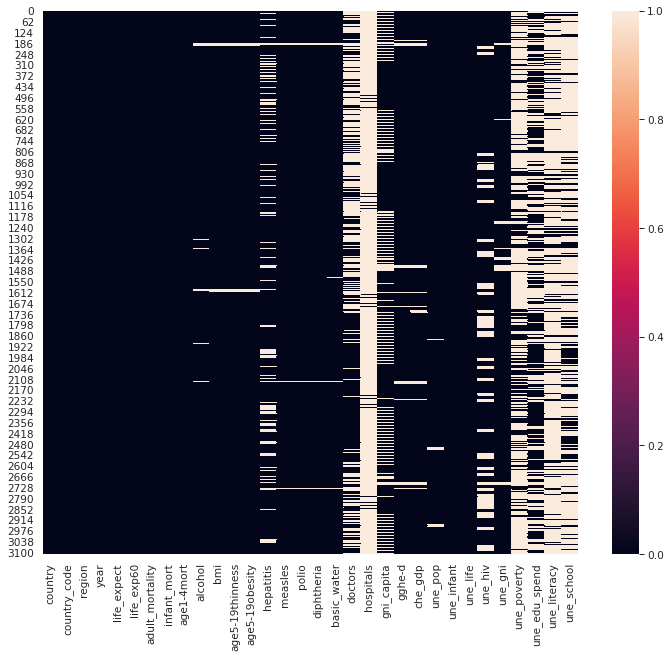

In [90]:
# Visualization of Nulls/NAs
plt.figure(figsize=(12, 10))
plt.autoscaletight_layout="True" 
sns.set_context("paper", font_scale=1.2) 
sns.heatmap(df.isna())

##Handling Null Values

Some features have more than 20% of missing values. We will not use these in the models. 

For others, we will replace/fill in with the mean of the country. 

The list of columns that needs to be removed (have more than 20% of missing values) - 

hospitals

hepatitis

doctors

gni_capita 

une_hiv

une_poverty

une_edu_spend

une_literacy

une_school  

In [91]:
#droping features with more than 20% nulls
df.drop(['hospitals','hepatitis', 'doctors', 'gni_capita','une_hiv','une_poverty','une_edu_spend','une_literacy','une_school'], axis='columns', inplace=True)

In [92]:
df.columns

Index(['country', 'country_code', 'region', 'year', 'life_expect',
       'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol',
       'bmi', 'age5-19thinness', 'age5-19obesity', 'measles', 'polio',
       'diphtheria', 'basic_water', 'gghe-d', 'che_gdp', 'une_pop',
       'une_infant', 'une_life', 'une_gni'],
      dtype='object')

In [93]:
nulls_breakdown()

[iloc = 9] alcohol has 50 null values: 1.61% null
[iloc = 10] bmi has 34 null values: 1.09% null
[iloc = 11] age5-19thinness has 34 null values: 1.09% null
[iloc = 12] age5-19obesity has 34 null values: 1.09% null
[iloc = 13] measles has 19 null values: 0.61% null
[iloc = 14] polio has 19 null values: 0.61% null
[iloc = 15] diphtheria has 19 null values: 0.61% null
[iloc = 16] basic_water has 32 null values: 1.03% null
[iloc = 17] gghe-d has 100 null values: 3.21% null
[iloc = 18] che_gdp has 117 null values: 3.76% null
[iloc = 19] une_pop has 37 null values: 1.19% null
[iloc = 22] une_gni has 117 null values: 3.76% null
Out of 23 total columns, 12 contain null values; 52.17% columns contain null values.


#Replace Missing Values Associated with Country Feature Mean

In [94]:
df['alcohol'] = df.groupby(['country'], sort=False)['alcohol'].apply(lambda x: x.fillna(x.mean()))
df['bmi'] = df.groupby(['country'], sort=False)['bmi'].apply(lambda x: x.fillna(x.mean()))
df['age5-19thinness'] = df.groupby(['country'], sort=False)['age5-19thinness'].apply(lambda x: x.fillna(x.mean()))
df['age5-19obesity'] = df.groupby(['country'], sort=False)['age5-19obesity'].apply(lambda x: x.fillna(x.mean()))
df['measles'] = df.groupby(['country'], sort=False)['measles'].apply(lambda x: x.fillna(x.mean()))
df['polio'] = df.groupby(['country'], sort=False)['polio'].apply(lambda x: x.fillna(x.mean()))
df['diphtheria'] = df.groupby(['country'], sort=False)['diphtheria'].apply(lambda x: x.fillna(x.mean()))
df['basic_water'] = df.groupby(['country'], sort=False)['basic_water'].apply(lambda x: x.fillna(x.mean()))
df['gghe-d'] = df.groupby(['country'], sort=False)['gghe-d'].apply(lambda x: x.fillna(x.mean()))
df['che_gdp'] = df.groupby(['country'], sort=False)['che_gdp'].apply(lambda x: x.fillna(x.mean()))
df['une_pop'] = df.groupby(['country'], sort=False)['une_pop'].apply(lambda x: x.fillna(x.mean()))
df['une_gni'] = df.groupby(['country'], sort=False)['une_gni'].apply(lambda x: x.fillna(x.mean()))
       

In [95]:
#after Picture
#Null Values by %
df.isnull().sum()/ len(df) * 100

country            0.000000
country_code       0.000000
region             0.000000
year               0.000000
life_expect        0.000000
life_exp60         0.000000
adult_mortality    0.000000
infant_mort        0.000000
age1-4mort         0.000000
alcohol            0.546448
bmi                1.092896
age5-19thinness    1.092896
age5-19obesity     1.092896
measles            0.000000
polio              0.000000
diphtheria         0.000000
basic_water        0.000000
gghe-d             2.185792
che_gdp            2.732240
une_pop            0.000000
une_infant         0.000000
une_life           0.000000
une_gni            2.732240
dtype: float64

In [96]:
df=df.dropna()
df.isnull().sum()/ len(df) * 100

country            0.0
country_code       0.0
region             0.0
year               0.0
life_expect        0.0
life_exp60         0.0
adult_mortality    0.0
infant_mort        0.0
age1-4mort         0.0
alcohol            0.0
bmi                0.0
age5-19thinness    0.0
age5-19obesity     0.0
measles            0.0
polio              0.0
diphtheria         0.0
basic_water        0.0
gghe-d             0.0
che_gdp            0.0
une_pop            0.0
une_infant         0.0
une_life           0.0
une_gni            0.0
dtype: float64

In [97]:
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,measles,polio,diphtheria,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,21.7,11.0,0.5,32.0,21.0,31.0,41.14431,1.11099,1.90860,16395.473,122.2,46.522,2530.0
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,21.8,10.9,0.5,60.0,28.0,42.0,42.25467,2.04631,4.48352,16945.753,118.9,47.059,2630.0
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,21.9,10.7,0.6,59.0,22.0,47.0,43.37680,1.30863,3.32946,17519.417,115.1,47.702,3180.0
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,22.0,10.5,0.7,44.0,21.0,46.0,44.36387,1.46560,3.54797,18121.479,110.8,48.440,3260.0
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,22.2,10.3,0.8,43.0,18.0,47.0,45.35134,1.68663,3.96720,18758.145,106.2,49.263,3560.0


The remaining nulls are low in %, and hence will be retained.

**Searching for Outliers by %**

In [98]:
col_dict={'life_expect':1, 'life_exp60':2,
        'adult_mortality':3, 'infant_mort':4, 
       'age1-4mort':5, 'alcohol':6, 'bmi':7, 'age5-19thinness':8, 'age5-19obesity':9,
       'measles':10, 'polio':11,   
       'diphtheria':12, 'basic_water':13  ,  'gghe-d':14, 'che_gdp':15 
}

for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0])),
                                                                             len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))*100/3111 ))

Number of outliers and percentage of it in life_expect : 19 and 0.6107360977177756
Number of outliers and percentage of it in life_exp60 : 0 and 0.0
Number of outliers and percentage of it in adult_mortality : 107 and 3.439408550305368
Number of outliers and percentage of it in infant_mort : 40 and 1.2857602057216329
Number of outliers and percentage of it in age1-4mort : 259 and 8.325297332047572
Number of outliers and percentage of it in alcohol : 1 and 0.032144005143040826
Number of outliers and percentage of it in bmi : 20 and 0.6428801028608164
Number of outliers and percentage of it in age5-19thinness : 87 and 2.7965284474445515
Number of outliers and percentage of it in age5-19obesity : 36 and 1.1571841851494695
Number of outliers and percentage of it in measles : 166 and 5.335904853744776
Number of outliers and percentage of it in polio : 208 and 6.685953069752491
Number of outliers and percentage of it in diphtheria : 213 and 6.846673095467695
Number of outliers and percentage

**Features with Outliers -**

age1-4mort,

measles,

polio,

diphtheria  


We may need to handle outliers of attributes. Some of the handling methodolgy is winsorize.

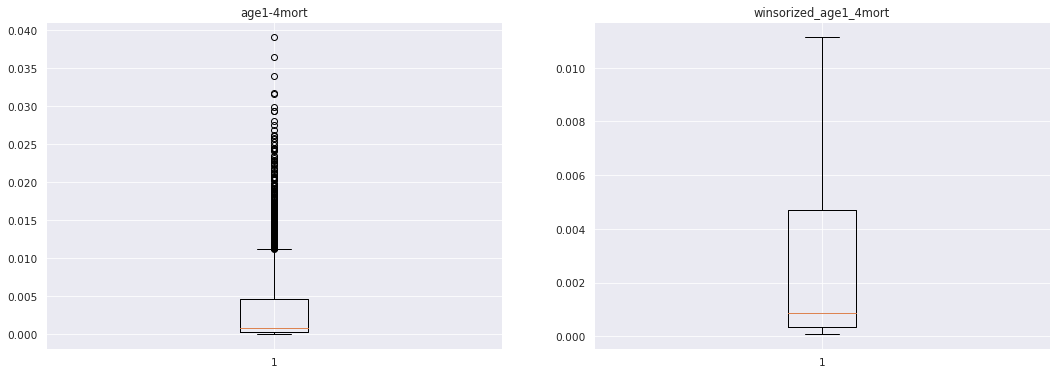

In [99]:
from scipy.stats.mstats import winsorize

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
age1_4mort = df['age1-4mort']
plt.boxplot(age1_4mort)
plt.title("age1-4mort")

plt.subplot(1,2,2)
winsorized_age1_4mort = winsorize(df['age1-4mort'],(0,0.09))
plt.boxplot(winsorized_age1_4mort)
plt.title("winsorized_age1_4mort")
df['winsorized_age1_4mort']=winsorized_age1_4mort
plt.show()


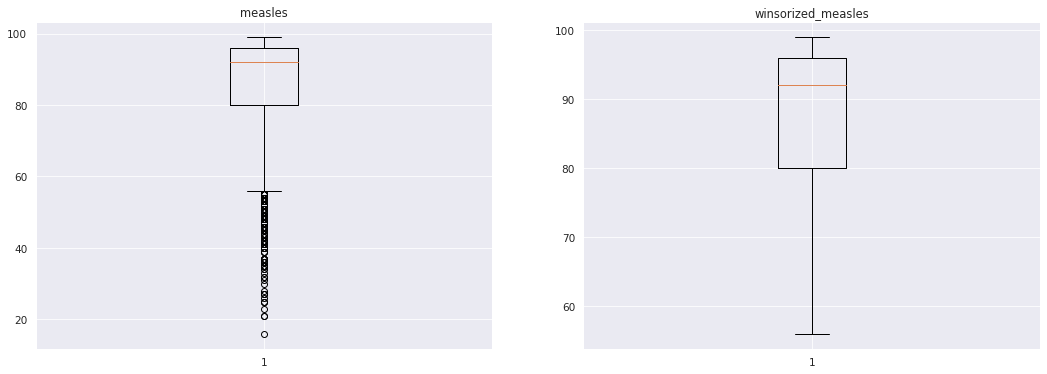

In [100]:
 plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
measles = df['measles']
plt.boxplot(measles)
plt.title("measles")

plt.subplot(1,2,2)
winsorized_measles = winsorize(df['measles'],(0.06,0))
plt.boxplot(winsorized_measles)
plt.title("winsorized_measles")
df['winsorized_measles']=winsorized_measles
plt.show()

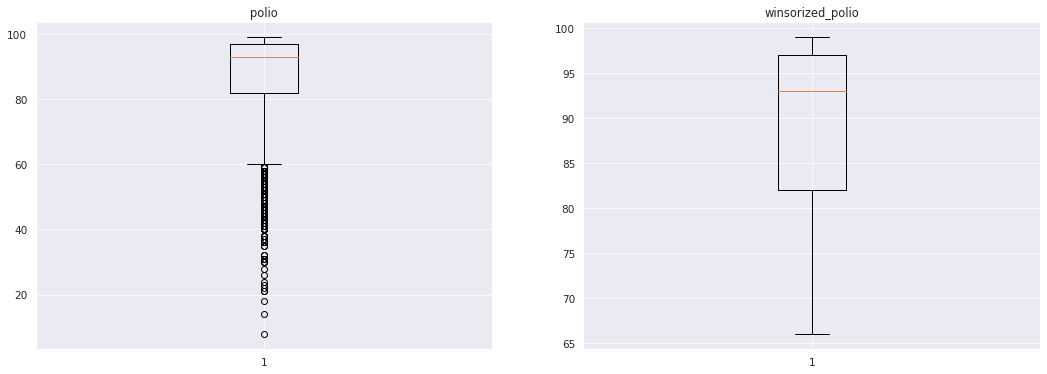

In [101]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
polio = df['polio']
plt.boxplot(polio)
plt.title("polio")

plt.subplot(1,2,2)
winsorized_polio = winsorize(df['polio'],(0.1,0))
plt.boxplot(winsorized_polio)
plt.title("winsorized_polio")
df['winsorized_polio']=winsorized_polio   
plt.show()

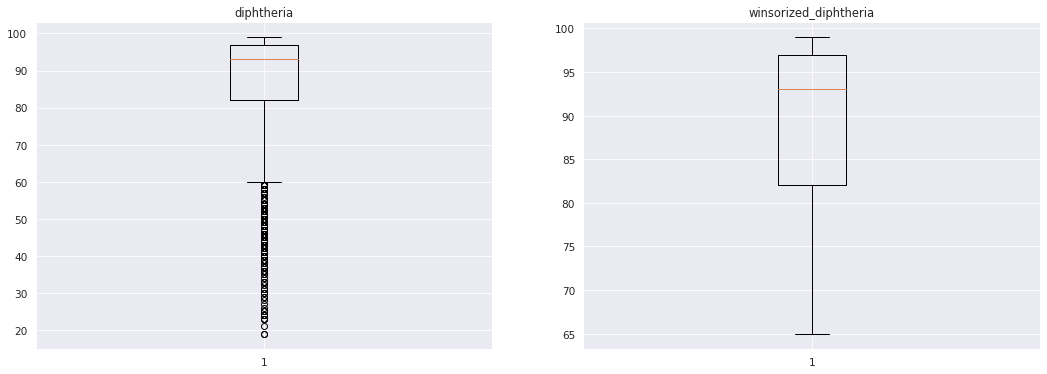

In [102]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
diphtheria = df['diphtheria']
plt.boxplot(diphtheria)
plt.title("diphtheria")

plt.subplot(1,2,2)
winsorized_diphtheria = winsorize(df['diphtheria'],(0.1,0))
plt.boxplot(winsorized_diphtheria)
plt.title("winsorized_diphtheria")
df['winsorized_diphtheria']=winsorized_diphtheria
plt.show()

In [103]:
# After Fix Picture:age1-4mort ,measles,polio,diphtheria 
col_dict={ 
       'age1-4mort':1, 'winsorized_age1_4mort':2,   'measles':3,
       'winsorized_measles':4,   'polio':5,   'winsorized_polio':6, 
       'diphtheria':7, 'winsorized_diphtheria':8   
}

for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0])),
                                                                             len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))*100/3111 ))

Number of outliers and percentage of it in age1-4mort : 259 and 8.325297332047572
Number of outliers and percentage of it in winsorized_age1_4mort : 0 and 0.0
Number of outliers and percentage of it in measles : 166 and 5.335904853744776
Number of outliers and percentage of it in winsorized_measles : 0 and 0.0
Number of outliers and percentage of it in polio : 208 and 6.685953069752491
Number of outliers and percentage of it in winsorized_polio : 0 and 0.0
Number of outliers and percentage of it in diphtheria : 213 and 6.846673095467695
Number of outliers and percentage of it in winsorized_diphtheria : 0 and 0.0


In [104]:
df.drop(['age1-4mort','measles', 'polio', 'diphtheria' ], axis='columns', inplace=True)

In [105]:
# Issue with Skewness
df.var()

year                     2.400812e+01
life_expect              8.303322e+01
life_exp60               8.522643e+00
adult_mortality          1.311825e+04
infant_mort              8.954874e-04
alcohol                  1.613712e+01
bmi                      4.899079e+00
age5-19thinness          2.232780e+01
age5-19obesity           2.105120e+01
basic_water              3.593166e+02
gghe-d                   4.248000e+00
che_gdp                  6.264578e+00
une_pop                  1.974175e+10
une_infant               7.473055e+02
une_life                 8.737340e+01
une_gni                  3.091330e+08
winsorized_age1_4mort    1.365281e-05
winsorized_measles       1.727157e+02
winsorized_polio         1.203046e+02
winsorized_diphtheria    1.231377e+02
dtype: float64

In [106]:
df.agg(['skew'] )

,year,life_expect,life_exp60,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio,winsorized_diphtheria
skew,0.0,-0.747111,0.313393,1.377771,1.170611,0.563051,-0.103543,1.488863,0.941148,-1.159653,0.92484,0.699378,8.073734,1.118556,-0.780378,2.187942,1.262228,-1.12128,-0.949537,-1.013112


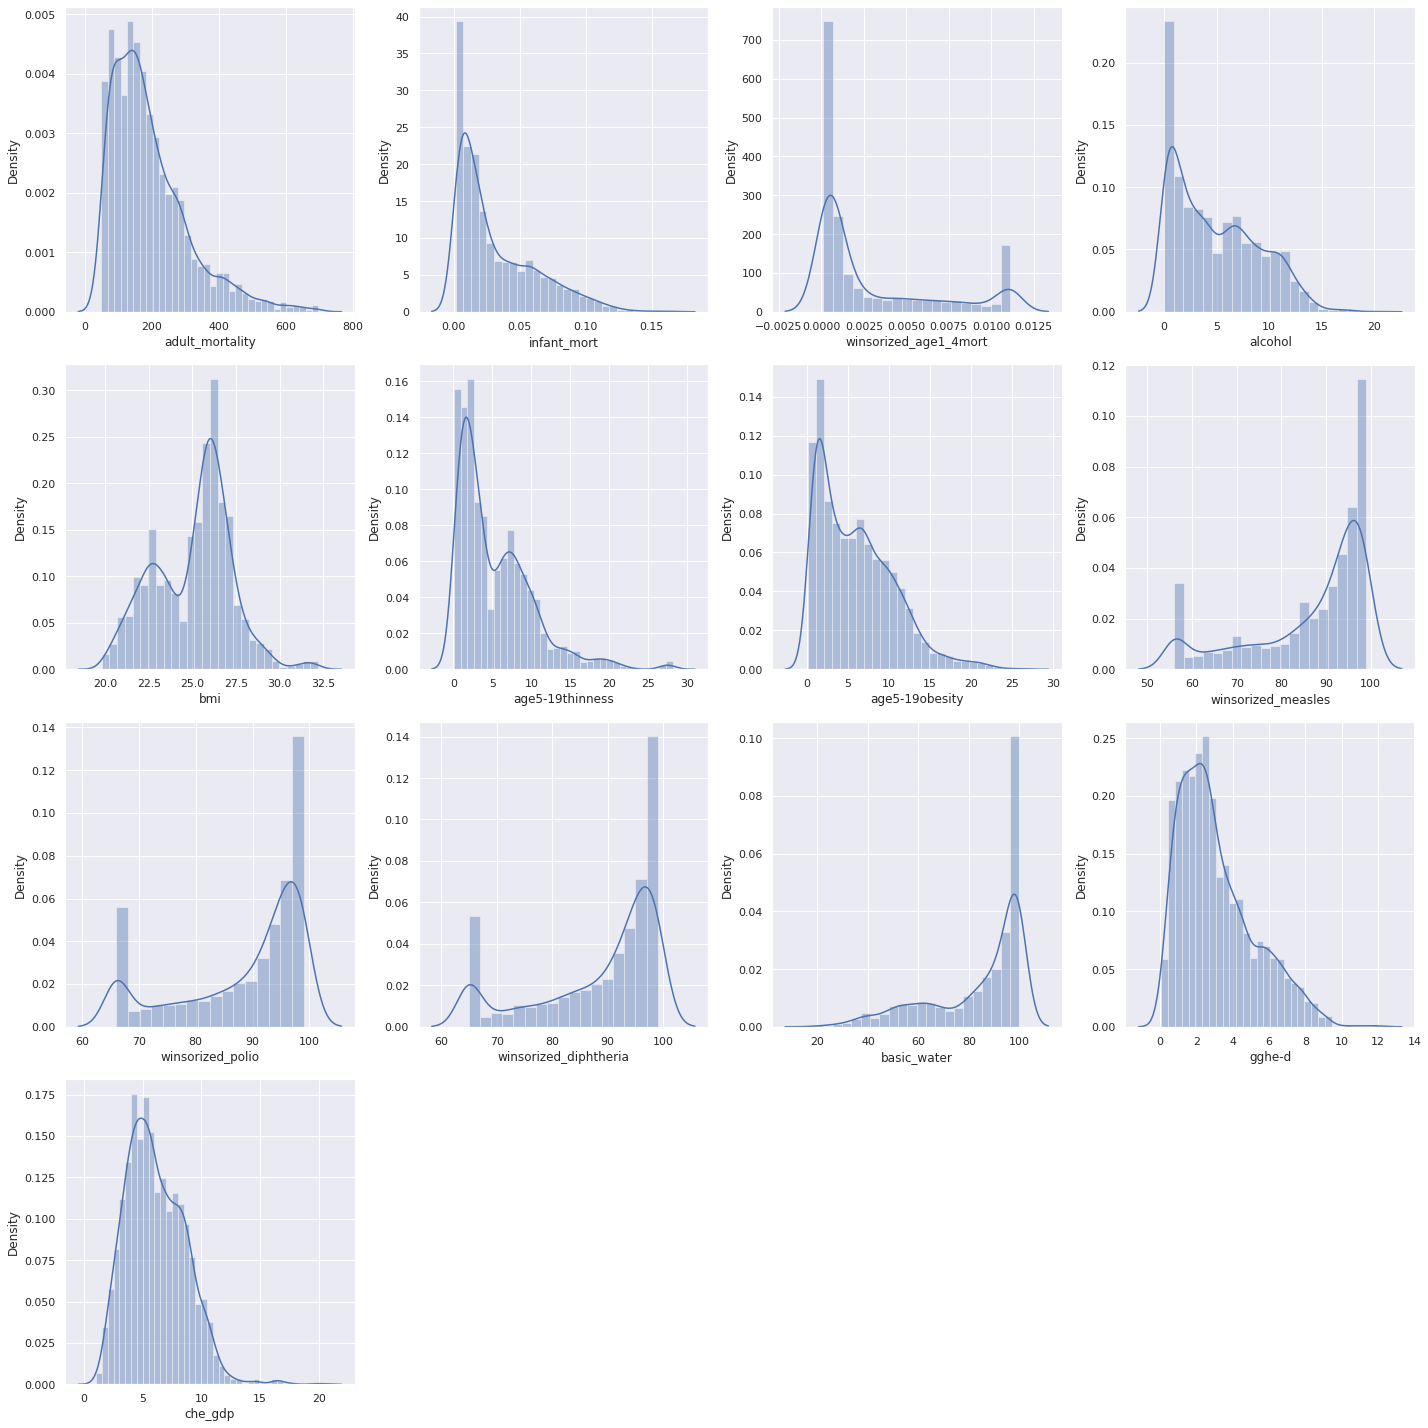

In [107]:
# visualizing Skewness
columns=[ 
        'adult_mortality' , 'infant_mort', 
       'winsorized_age1_4mort', 'alcohol','bmi', 'age5-19thinness', 'age5-19obesity',
       'winsorized_measles', 'winsorized_polio',   
       'winsorized_diphtheria', 'basic_water'  ,  'gghe-d', 'che_gdp' 
   ]

for column,i in zip(columns,range(len(columns))):
    sns.set(rc={'figure.figsize':(20,20)})
    plt.subplot(4,4,i+1)  
    sns.distplot(df[column])   
    plt.tight_layout()
    

In [108]:
# resolving Skewness
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
 
columns= [  'alcohol','bmi','age5-19thinness','age5-19obesity','basic_water','gghe-d','che_gdp','une_pop','une_infant','une_life','une_gni'
    ,'winsorized_age1_4mort','winsorized_diphtheria','winsorized_polio','winsorized_measles']
for feature in columns:
    sc= StandardScaler()
    df[[feature]]= sc.fit_transform(df[[feature]])

In [109]:
nulls_breakdown()

[iloc = 9] alcohol has 17 null values: 0.55% null
[iloc = 10] bmi has 34 null values: 1.09% null
[iloc = 11] age5-19thinness has 34 null values: 1.09% null
[iloc = 12] age5-19obesity has 34 null values: 1.09% null
[iloc = 17] gghe-d has 68 null values: 2.19% null
[iloc = 18] che_gdp has 85 null values: 2.73% null
[iloc = 22] une_gni has 85 null values: 2.73% null
Out of 23 total columns, 7 contain null values; 30.43% columns contain null values.


In [110]:
df=df.dropna()
df.isnull().sum()/ len(df) * 100

country                  0.0
country_code             0.0
region                   0.0
year                     0.0
life_expect              0.0
life_exp60               0.0
adult_mortality          0.0
infant_mort              0.0
alcohol                  0.0
bmi                      0.0
age5-19thinness          0.0
age5-19obesity           0.0
basic_water              0.0
gghe-d                   0.0
che_gdp                  0.0
une_pop                  0.0
une_infant               0.0
une_life                 0.0
une_gni                  0.0
winsorized_age1_4mort    0.0
winsorized_measles       0.0
winsorized_polio         0.0
winsorized_diphtheria    0.0
dtype: float64

In [111]:
df.describe()

,year,life_expect,life_exp60,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio,winsorized_diphtheria
count,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03,2.958000e+03
mean,2008.000000,69.294443,18.954183,192.597764,0.031933,5.344684e-17,-1.929829e-15,-3.057430e-16,8.640072e-16,-1.820252e-16,-1.201053e-16,2.912553e-17,-1.655201e-17,1.356439e-16,-6.010705e-16,1.984364e-16,3.907174e-16,-5.617173e-16,1.081548e-15,1.107220e-15
std,4.899808,9.112256,2.919357,114.534942,0.029925,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00
min,2000.000000,36.227360,10.728000,49.201850,0.001470,-1.225126e+00,-2.376044e+00,-1.109356e+00,-1.284862e+00,-3.428897e+00,-1.475660e+00,-2.033236e+00,-2.712172e-01,-1.037755e+00,-3.171808e+00,-8.321721e-01,-7.673385e-01,-2.321229e+00,-2.030833e+00,-2.096974e+00
25%,2004.000000,63.458990,16.629035,107.310825,0.008099,-9.122297e-01,-8.283800e-01,-7.706907e-01,-8.924809e-01,-6.164992e-01,-7.671304e-01,-7.502680e-01,-2.558265e-01,-8.072583e-01,-6.353457e-01,-6.898165e-01,-7.010209e-01,-4.947327e-01,-5.718426e-01,-5.647344e-01
50%,2008.000000,71.686025,18.569155,164.482650,0.019865,-2.011588e-01,2.448179e-01,-3.473593e-01,-1.513175e-01,4.528736e-01,-2.432793e-01,-1.375844e-01,-2.132166e-01,-3.865101e-01,2.565261e-01,-3.807866e-01,-5.589119e-01,4.185155e-01,4.312130e-01,4.267151e-01
75%,2012.000000,75.599265,21.205823,247.961700,0.050278,7.513235e-01,6.515034e-01,5.416366e-01,6.552426e-01,7.941668e-01,5.620524e-01,7.004966e-01,-8.847481e-02,6.260293e-01,7.002016e-01,3.326984e-01,4.808526e-01,7.229315e-01,7.959605e-01,7.872422e-01
max,2016.000000,84.166160,26.394020,696.874200,0.164515,3.799750e+00,3.227179e+00,4.817284e+00,4.513652e+00,8.610405e-01,4.347729e+00,5.714345e+00,9.793970e+00,4.113665e+00,1.594388e+00,6.122066e+00,2.219658e+00,9.512436e-01,9.783342e-01,9.675058e-01


In [112]:
#After Fix
df.var()

year                        24.008116
life_expect                 83.033218
life_exp60                   8.522643
adult_mortality          13118.252902
infant_mort                  0.000895
alcohol                      1.000338
bmi                          1.000338
age5-19thinness              1.000338
age5-19obesity               1.000338
basic_water                  1.000338
gghe-d                       1.000338
che_gdp                      1.000338
une_pop                      1.000338
une_infant                   1.000338
une_life                     1.000338
une_gni                      1.000338
winsorized_age1_4mort        1.000338
winsorized_measles           1.000338
winsorized_polio             1.000338
winsorized_diphtheria        1.000338
dtype: float64

In [113]:
df.agg(['skew'] )

,year,life_expect,life_exp60,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio,winsorized_diphtheria
skew,0.0,-0.747111,0.313393,1.377771,1.170611,0.563051,-0.103543,1.488863,0.941148,-1.159653,0.92484,0.699378,8.073734,1.118556,-0.780378,2.187942,1.262228,-1.12128,-0.949537,-1.013112


In [114]:
df1=df
#check point 1

In [115]:
columns= [   
         'alcohol','bmi','age5-19thinness','age5-19obesity',  
         'basic_water',	'gghe-d','che_gdp',	'une_pop','une_infant','une_life','une_gni','winsorized_age1_4mort'
    ,'winsorized_diphtheria','winsorized_polio','winsorized_measles']
for feature in columns:
   df[[feature]] = np.log2( df[[feature]]+1)

In [116]:
df.agg(['skew'] )

,year,life_expect,life_exp60,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio,winsorized_diphtheria
skew,0.0,-0.747111,0.313393,1.377771,1.170611,-1.545063,-2.141464,-0.857566,-1.178129,-3.546109,-1.226714,-1.537011,4.200104,-0.855449,-2.884693,0.360837,0.660466,-2.7752,-2.538473,-2.426769


In [117]:
def nulls_breakdown(df=df):
    df_cols = list(df.columns)
    cols_total_count = len(list(df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = df[col].isnull().sum()
        total_count = df[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))



In [118]:
df=df.dropna()
df.isnull().sum()/ len(df) * 100

country                  0.0
country_code             0.0
region                   0.0
year                     0.0
life_expect              0.0
life_exp60               0.0
adult_mortality          0.0
infant_mort              0.0
alcohol                  0.0
bmi                      0.0
age5-19thinness          0.0
age5-19obesity           0.0
basic_water              0.0
gghe-d                   0.0
che_gdp                  0.0
une_pop                  0.0
une_infant               0.0
une_life                 0.0
une_gni                  0.0
winsorized_age1_4mort    0.0
winsorized_measles       0.0
winsorized_polio         0.0
winsorized_diphtheria    0.0
dtype: float64

##Check for collinearity

In [119]:
nulls_breakdown(df)

Out of 23 total columns, 0 contain null values; 0.0% columns contain null values.


In [120]:
df.describe()

,year,life_expect,life_exp60,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio,winsorized_diphtheria
count,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000
mean,2008.163895,74.017325,20.232203,144.474996,0.014808,0.197082,0.437925,-1.782312,-0.019448,0.601741,0.180579,-0.037863,-0.213805,-2.030763,0.515475,-0.143116,-1.414605,0.555839,0.523437,0.536215
std,4.842452,4.316120,2.197621,55.663268,0.011360,1.345661,0.698058,1.607996,1.186312,0.466876,1.100651,1.265841,0.481979,1.796467,0.618813,0.902669,0.559235,0.607746,0.625114,0.577937
min,2000.000000,60.398450,14.744080,52.534050,0.002040,-13.914635,-5.335769,-5.824709,-5.620714,-6.799389,-6.650749,-9.297415,-0.456439,-8.649393,-5.708430,-2.252068,-2.070511,-4.361617,-3.979147,-3.742004
25%,2004.000000,71.499330,18.717015,100.890550,0.005795,-0.341477,0.262590,-2.592400,-0.522654,0.512526,-0.388645,-0.584786,-0.429630,-3.108930,0.326120,-0.826872,-1.843330,0.504382,0.422261,0.418550
50%,2008.000000,74.228230,20.108530,139.247400,0.012490,0.538913,0.556556,-1.577155,0.206477,0.758837,0.350959,0.209205,-0.379440,-1.469765,0.622289,-0.192788,-1.535351,0.719689,0.690271,0.684351
75%,2012.000000,77.034395,21.939230,179.534600,0.019925,1.158820,0.800644,-0.763315,0.801108,0.871382,0.943455,0.846776,-0.249243,-0.709203,0.892402,0.554355,-1.203166,0.906998,0.916207,0.908716
max,2016.000000,82.664090,25.269660,334.737800,0.084335,2.262959,1.692900,1.616183,2.123768,0.896109,1.951946,2.440730,3.432154,1.206305,1.281281,2.097443,1.266788,0.964394,0.984286,0.976368


Correlation Values for the 100 countries left after Data Cleaning:


life_expect  adult_mortality          0.932791
             life_exp60               0.883212
             une_life                 0.877911
             infant_mort              0.783734
             une_infant               0.774884
             une_gni                  0.732989
             age5-19thinness          0.626548
             age5-19obesity           0.555169
             basic_water              0.545961
             gghe-d                   0.540387
             che_gdp                  0.412707
             alcohol                  0.222314
             bmi                      0.183400
             year                     0.106445
             une_pop                  0.093995
year         winsorized_polio         0.047686
             winsorized_diphtheria    0.013265
dtype: float64

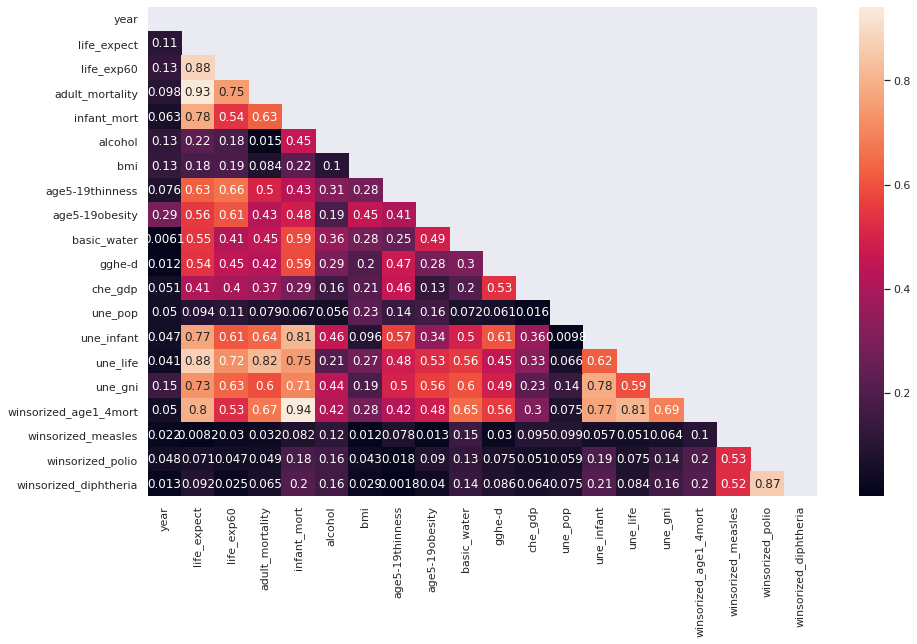

In [121]:
corrmat = df.corr().abs()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
top_corr_features = corrmat.index
plt.figure(figsize=(15,9))

#plot heat map
sns.heatmap(df[top_corr_features].corr().abs(),annot=True,mask=mask)
sol = (corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
                 .stack().sort_values(kind="quicksort",ascending=False))
LE=pd.Series(corrmat.unstack()[18:36]).sort_values(kind="quicksort",ascending=False)
print('Correlation Values for the {} countries left after Data Cleaning:'.format(len(df['country'].unique())))
LE[1:18]

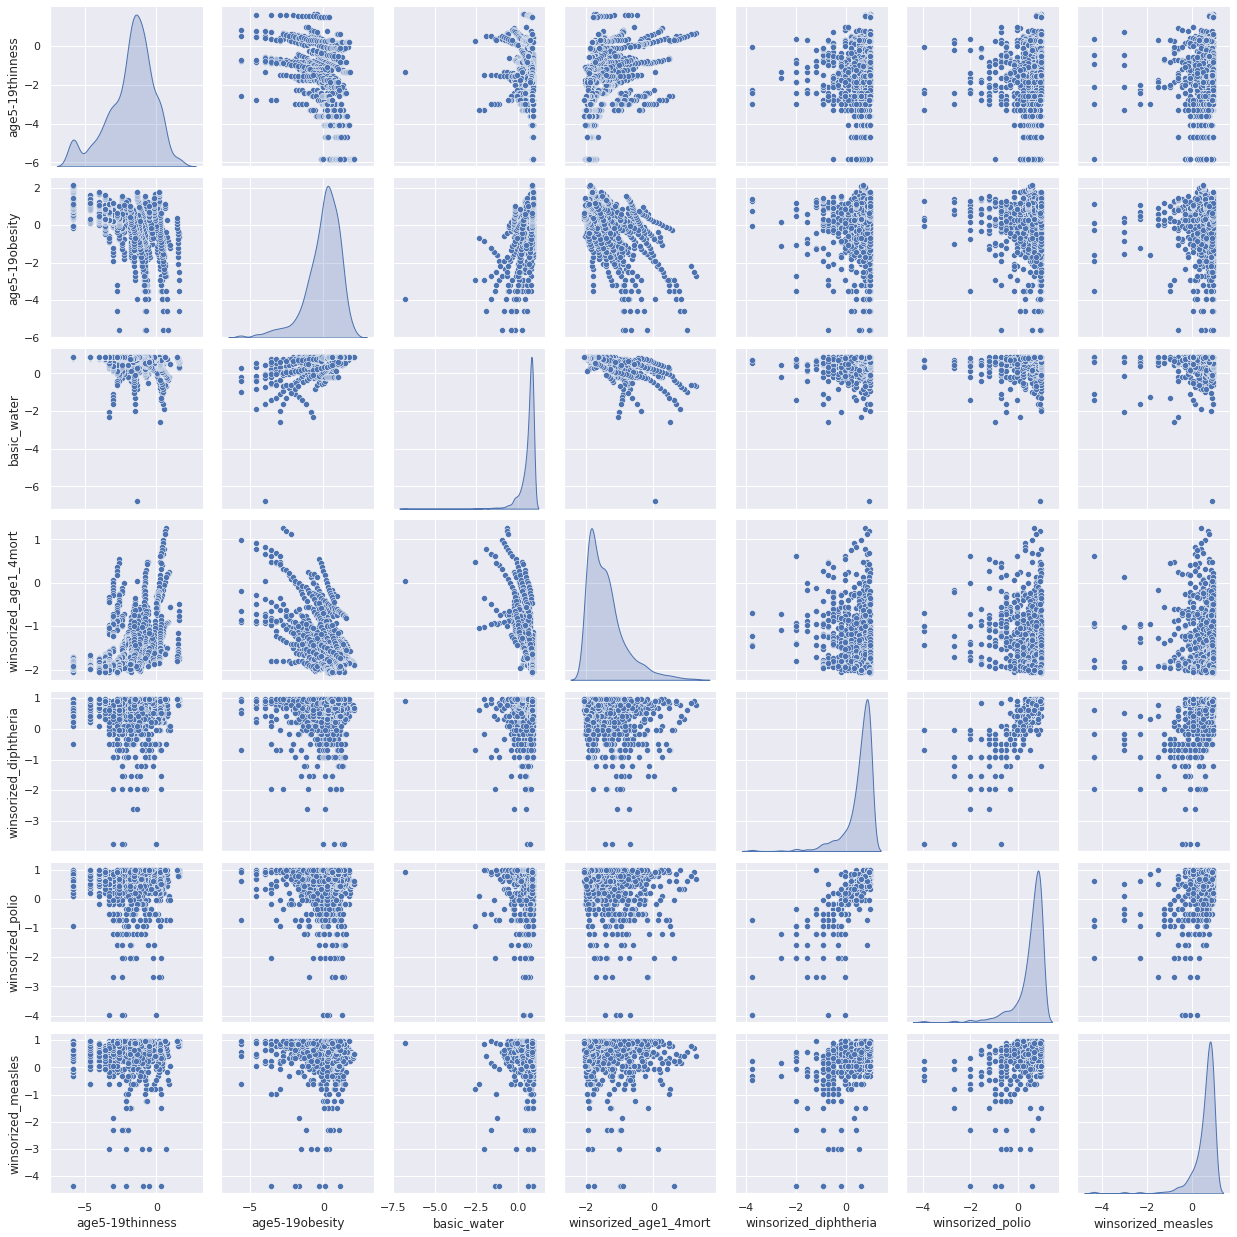

In [122]:
df_cols=df[[  	'age5-19thinness'	,'age5-19obesity',	  
         'basic_water',	 'winsorized_age1_4mort',	'winsorized_diphtheria',	'winsorized_polio',	'winsorized_measles']]
sns.pairplot(df_cols,diag_kind='kde')


Multi-Collinearity Feature life_expect and Feature life_exp60 --> Correlation Score 0.8832122138698063
Multi-Collinearity Feature life_expect and Feature une_life --> Correlation Score 0.8779109418317955
Multi-Collinearity Feature life_exp60 and Feature life_expect --> Correlation Score 0.8832122138698063
Multi-Collinearity Feature infant_mort and Feature une_infant --> Correlation Score 0.8146354381122014
Multi-Collinearity Feature infant_mort and Feature winsorized_age1_4mort --> Correlation Score 0.9407536780339694
Multi-Collinearity Feature une_infant and Feature infant_mort --> Correlation Score 0.8146354381122014
Multi-Collinearity Feature une_life and Feature life_expect --> Correlation Score 0.8779109418317955
Multi-Collinearity Feature winsorized_age1_4mort and Feature infant_mort --> Correlation Score 0.9407536780339694
Multi-Collinearity Feature winsorized_polio and Feature winsorized_diphtheria --> Correlation Score 0.8652132685654584
Multi-Collinearity Feature winsorized_d

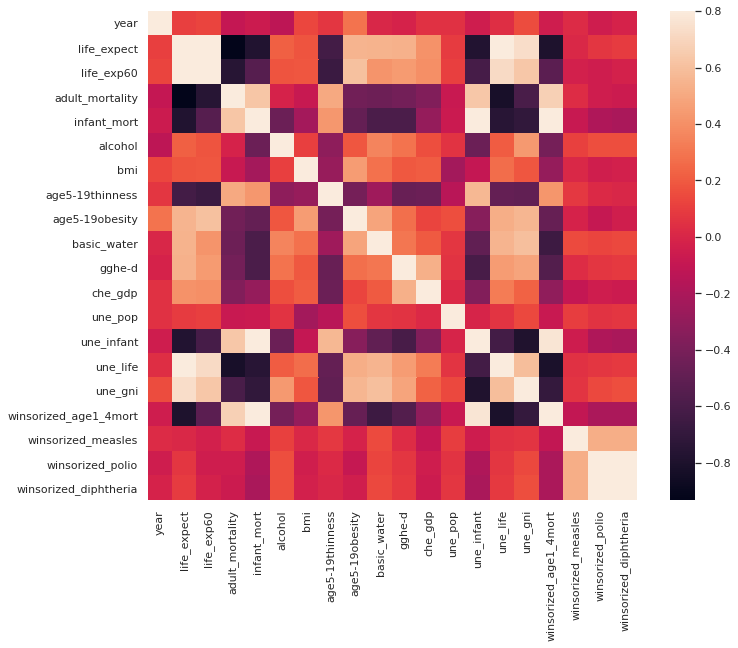

In [123]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

for i in range(len(corrmat.columns)):
  for j in range(len(corrmat.index)):
    if corrmat.iloc[i,j]>0.80 and corrmat.iloc[i,j] != 1.0:
      print('Multi-Collinearity Feature {} and Feature {} --> Correlation Score {}'.format(corrmat.columns[i],corrmat.columns[j],corrmat.iloc[i,j]))

In [124]:
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio,winsorized_diphtheria
78,Botswana,BWA,Africa,2010,61.23447,16.74382,331.2066,0.041370,0.253909,-0.818557,0.701596,-0.822920,-0.049010,0.291643,0.045793,-0.429757,0.388067,-4.305216,-0.234663,0.132436,0.784865,0.76958,0.684351
79,Botswana,BWA,Africa,2011,61.91600,16.82351,319.0678,0.041240,0.371287,-0.707935,0.624463,-0.664990,0.049076,0.281864,-0.208280,-0.429366,0.408095,-2.105470,-0.085272,0.027152,0.847224,0.76958,0.684351
80,Botswana,BWA,Africa,2012,62.88486,16.92823,301.5431,0.039235,0.103937,-0.707935,0.563780,-0.522654,0.126835,0.502266,0.016136,-0.429032,0.322044,-1.308707,-0.014759,-0.061760,0.847224,0.76958,0.684351
81,Botswana,BWA,Africa,2013,63.64810,17.01068,291.4623,0.036720,-0.039296,-0.707935,0.478683,-0.352389,0.197095,0.511008,0.062655,-0.428714,0.235024,-0.835374,0.068208,-0.178443,0.847224,0.76958,0.684351
82,Botswana,BWA,Africa,2014,64.47293,17.13385,277.0256,0.035655,0.016051,-0.605193,0.411395,-0.200115,0.262511,0.419506,-0.332695,-0.428354,0.221506,-0.517956,0.131759,-0.293385,0.847224,0.76958,0.684351


4 pairs of features have high correlation
infant_deaths and under-five_deaths

1.   life_expect  and une_life 
2.   winsorized_age1_4mort and infant_mort 
3.   winsorized_age1_4mort and une_infant  
4.   winsorized_polio and winsorized_diphtheria 


 
Best Option to deal with multi-collinearity is to remove any one feature

In [125]:
 df.drop(['une_life','infant_mort', 'une_infant', 'winsorized_diphtheria'], axis='columns', inplace=True)

In [126]:
corrmat['life_expect']

year                     0.106445
life_expect              1.000000
life_exp60               0.883212
adult_mortality         -0.932791
infant_mort             -0.783734
alcohol                  0.222314
bmi                      0.183400
age5-19thinness         -0.626548
age5-19obesity           0.555169
basic_water              0.545961
gghe-d                   0.540387
che_gdp                  0.412707
une_pop                  0.093995
une_infant              -0.774884
une_life                 0.877911
une_gni                  0.732989
winsorized_age1_4mort   -0.795953
winsorized_measles       0.008155
winsorized_polio         0.070908
winsorized_diphtheria    0.091920
Name: life_expect, dtype: float64

In [127]:
df1.head(1)

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_infant,une_life,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio,winsorized_diphtheria
0,Angola,AGO,Africa,2000,47.3373,14.734,383.5583,0.137985,-2.817485,NaN,1.13606,NaN,NaN,-4.912397,NaN,-0.243061,2.129155,NaN,-1.796581,1.686908,NaN,NaN,NaN


Dealing With Categorical Data¶


In [128]:
'une_hiv', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school'

('une_hiv', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school')

In [129]:
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio
78,Botswana,BWA,Africa,2010,61.23447,16.74382,331.2066,0.253909,-0.818557,0.701596,-0.822920,-0.049010,0.291643,0.045793,-0.429757,-0.234663,0.132436,0.784865,0.76958
79,Botswana,BWA,Africa,2011,61.91600,16.82351,319.0678,0.371287,-0.707935,0.624463,-0.664990,0.049076,0.281864,-0.208280,-0.429366,-0.085272,0.027152,0.847224,0.76958
80,Botswana,BWA,Africa,2012,62.88486,16.92823,301.5431,0.103937,-0.707935,0.563780,-0.522654,0.126835,0.502266,0.016136,-0.429032,-0.014759,-0.061760,0.847224,0.76958
81,Botswana,BWA,Africa,2013,63.64810,17.01068,291.4623,-0.039296,-0.707935,0.478683,-0.352389,0.197095,0.511008,0.062655,-0.428714,0.068208,-0.178443,0.847224,0.76958
82,Botswana,BWA,Africa,2014,64.47293,17.13385,277.0256,0.016051,-0.605193,0.411395,-0.200115,0.262511,0.419506,-0.332695,-0.428354,0.131759,-0.293385,0.847224,0.76958



## **Supervised Modeling-Approach**
Further, we will be using Supervised Learning Models to predict the Life expectancy. The list of models we would be exploring :
1)Decision Tree
2)RandomForest Tree

For each of these models, will identify the most significant features.

Also, would be evaluating the performance of each models.Some of the perfomance criteria we would evaluating are:

1)MSE
2)RMSE
3)Classification Report-Recall, accuracy, Precision,F1-Score
4)Model Score/accuracy

If required we might use GridsearchCV.

 

In [130]:
 df2=df

In [131]:
df.describe()

,year,life_expect,life_exp60,adult_mortality,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio
count,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000,1263.000000
mean,2008.163895,74.017325,20.232203,144.474996,0.197082,0.437925,-1.782312,-0.019448,0.601741,0.180579,-0.037863,-0.213805,-0.143116,-1.414605,0.555839,0.523437
std,4.842452,4.316120,2.197621,55.663268,1.345661,0.698058,1.607996,1.186312,0.466876,1.100651,1.265841,0.481979,0.902669,0.559235,0.607746,0.625114
min,2000.000000,60.398450,14.744080,52.534050,-13.914635,-5.335769,-5.824709,-5.620714,-6.799389,-6.650749,-9.297415,-0.456439,-2.252068,-2.070511,-4.361617,-3.979147
25%,2004.000000,71.499330,18.717015,100.890550,-0.341477,0.262590,-2.592400,-0.522654,0.512526,-0.388645,-0.584786,-0.429630,-0.826872,-1.843330,0.504382,0.422261
50%,2008.000000,74.228230,20.108530,139.247400,0.538913,0.556556,-1.577155,0.206477,0.758837,0.350959,0.209205,-0.379440,-0.192788,-1.535351,0.719689,0.690271
75%,2012.000000,77.034395,21.939230,179.534600,1.158820,0.800644,-0.763315,0.801108,0.871382,0.943455,0.846776,-0.249243,0.554355,-1.203166,0.906998,0.916207
max,2016.000000,82.664090,25.269660,334.737800,2.262959,1.692900,1.616183,2.123768,0.896109,1.951946,2.440730,3.432154,2.097443,1.266788,0.964394,0.984286


In [132]:
df.describe()

#set up bins 
bins = [44,54,64,74,84] 
labels=[1,2,3,4]
df['world']=pd.cut(df['life_expect'],bins=bins,labels=labels) 
df_new=df

In [133]:
df_new.head()
df_new = df_new.drop(['life_expect','country','country_code','region','year','life_exp60','adult_mortality'],axis=1)

In [134]:
df_new.head()

,alcohol,bmi,age5-19thinness,age5-19obesity,basic_water,gghe-d,che_gdp,une_pop,une_gni,winsorized_age1_4mort,winsorized_measles,winsorized_polio,world
78,0.253909,-0.818557,0.701596,-0.822920,-0.049010,0.291643,0.045793,-0.429757,-0.234663,0.132436,0.784865,0.76958,2
79,0.371287,-0.707935,0.624463,-0.664990,0.049076,0.281864,-0.208280,-0.429366,-0.085272,0.027152,0.847224,0.76958,2
80,0.103937,-0.707935,0.563780,-0.522654,0.126835,0.502266,0.016136,-0.429032,-0.014759,-0.061760,0.847224,0.76958,2
81,-0.039296,-0.707935,0.478683,-0.352389,0.197095,0.511008,0.062655,-0.428714,0.068208,-0.178443,0.847224,0.76958,2
82,0.016051,-0.605193,0.411395,-0.200115,0.262511,0.419506,-0.332695,-0.428354,0.131759,-0.293385,0.847224,0.76958,3


In [135]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [136]:
from sklearn.model_selection import train_test_split

y = df_new['world']
x = df_new.drop(['world'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [137]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [138]:
X_train.columns

Index(['alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity', 'basic_water',
       'gghe-d', 'che_gdp', 'une_pop', 'une_gni', 'winsorized_age1_4mort',
       'winsorized_measles', 'winsorized_polio'],
      dtype='object')

In [139]:
# Import LogisticRegression
# note we are using the rescaled data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=2)
# Instantiate a LogisticRegression classifier with default parameter values
 
# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred_lr = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred_lr)

# Print the confusion matrix of the logreg model
print("Classification report - \n", classification_report(y_test,y_pred_lr))

acc = accuracy_score(y_test, y_pred_lr)
print("Test set accuracy: {:.2f}".format(acc))

Accuracy of logistic regression classifier:  0.8181818181818182
Classification report - 
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         6
           3       0.77      0.87      0.81       116
           4       0.88      0.81      0.84       131

    accuracy                           0.82       253
   macro avg       0.55      0.56      0.55       253
weighted avg       0.80      0.82      0.81       253

Test set accuracy: 0.82


In [141]:
 X_train.columns

Index(['alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity', 'basic_water',
       'gghe-d', 'che_gdp', 'une_pop', 'une_gni', 'winsorized_age1_4mort',
       'winsorized_measles', 'winsorized_polio'],
      dtype='object')

Decision Tree Classifier Created


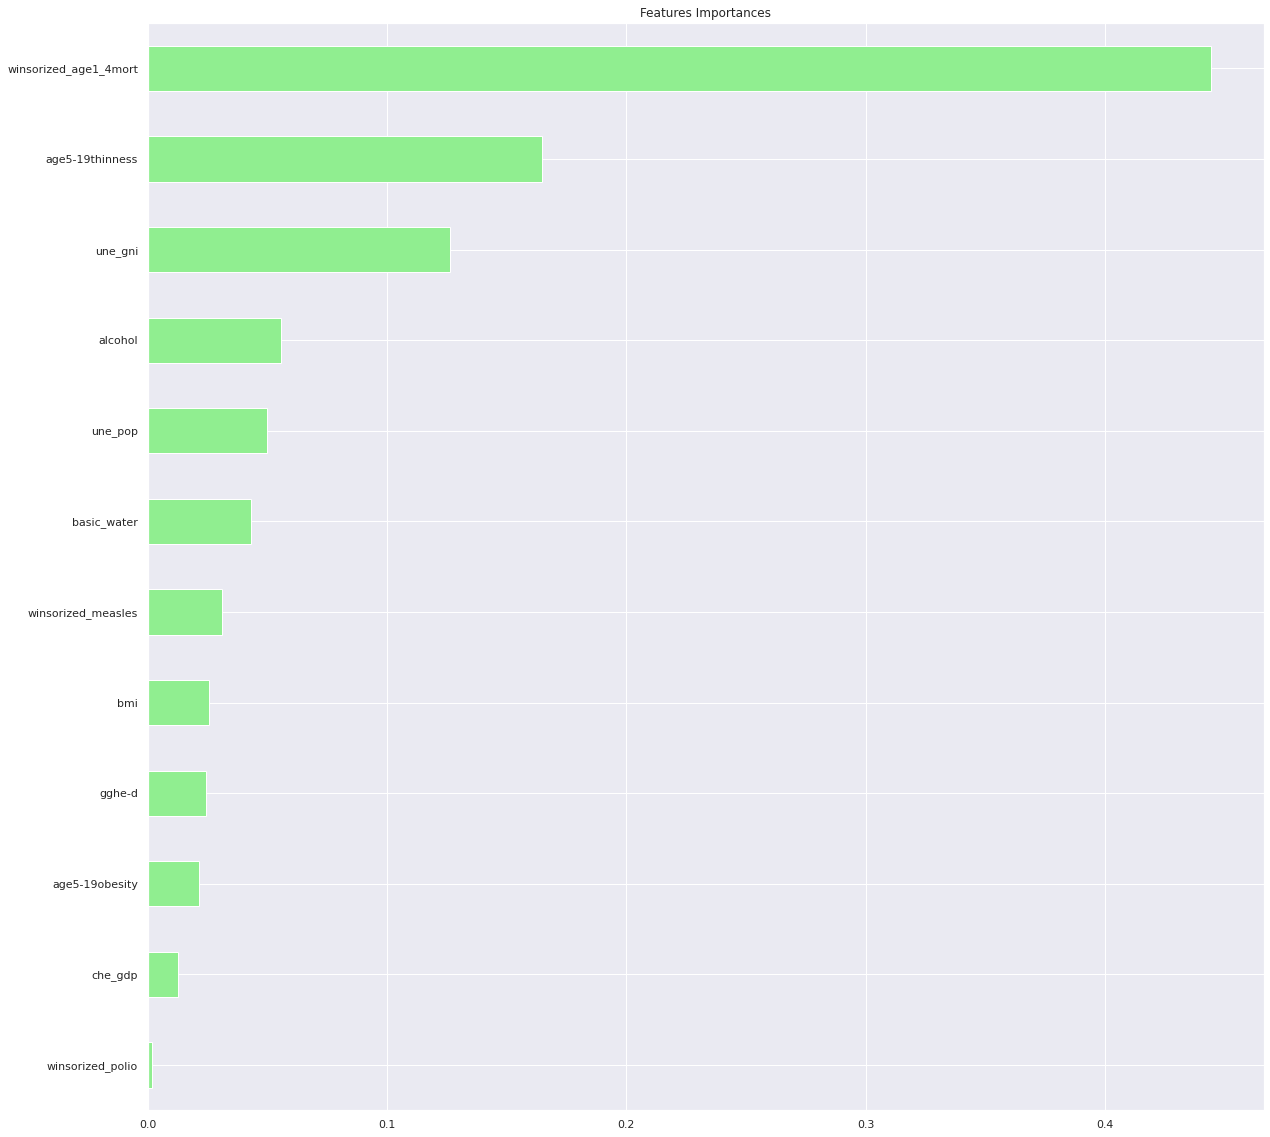

In [142]:
#import necessary modules
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

tree_reg = DecisionTreeClassifier(  
            random_state=3)

tree_reg.fit(X_train,y_train)
#print creation message
print('Decision Tree Classifier Created')


# Create a pd.Series of features importances
importances = pd.Series(data=tree_reg.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()


In [143]:
X_train.columns

Index(['alcohol', 'bmi', 'age5-19thinness', 'age5-19obesity', 'basic_water',
       'gghe-d', 'che_gdp', 'une_pop', 'une_gni', 'winsorized_age1_4mort',
       'winsorized_measles', 'winsorized_polio'],
      dtype='object')

In [144]:
# Predicting the values of test data
y_pred = tree_reg.predict(X_test)

# Get the accuracy score of Random Forest model and print it
print("Accuracy of Decision Tree Classifier: ")


# print classification report
print("Classification report - \n", classification_report(y_test,y_pred))

tree_reg.score(X_test, y_test)
print("Test set score: {:.2f}".format(tree_reg.score(X_test, y_test)))

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Accuracy of Decision Tree Classifier: 
Classification report - 
               precision    recall  f1-score   support

           2       1.00      0.50      0.67         6
           3       0.90      0.95      0.92       116
           4       0.95      0.92      0.93       131

    accuracy                           0.92       253
   macro avg       0.95      0.79      0.84       253
weighted avg       0.93      0.92      0.92       253

Test set score: 0.92
Test set accuracy: 0.92


In [145]:
from sklearn.metrics import mean_squared_error as MSE
 
# Compute mse_dt
mse_tree_reg = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_tree_reg = mse_tree_reg**(1/2)

# Print rmse_dt
print("Test set RMSE of tree_reg: {:.2f}".format(rmse_tree_reg))

Test set RMSE of tree_reg: 0.29


In [146]:
# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Logistic Regression test set RMSE: {:.2f}'.format(rmse_lr))
#decision tree regressor is better than linear Regression 

Logistic Regression test set RMSE: 0.43


In [147]:
 #Let's see the rules that the decision tree provides
from sklearn.tree import export_text
#get rules
tree_rules = export_text(tree_reg)
print(tree_rules)

|--- feature_9 <= -1.69
|   |--- feature_2 <= -1.83
|   |   |--- feature_2 <= -1.94
|   |   |   |--- class: 4
|   |   |--- feature_2 >  -1.94
|   |   |   |--- feature_10 <= 0.94
|   |   |   |   |--- class: 4
|   |   |   |--- feature_10 >  0.94
|   |   |   |   |--- feature_0 <= 1.42
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_0 >  1.42
|   |   |   |   |   |--- class: 3
|   |--- feature_2 >  -1.83
|   |   |--- feature_9 <= -1.79
|   |   |   |--- feature_9 <= -1.98
|   |   |   |   |--- feature_6 <= 0.74
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_6 >  0.74
|   |   |   |   |   |--- class: 3
|   |   |   |--- feature_9 >  -1.98
|   |   |   |   |--- feature_10 <= 0.94
|   |   |   |   |   |--- feature_0 <= 1.78
|   |   |   |   |   |   |--- feature_6 <= -0.44
|   |   |   |   |   |   |   |--- feature_10 <= 0.78
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_10 >  0.78
|   |   |   |   |   |   |   |   |--- class: 3
|   |

Train the model using Random forest Tree Classifier

> Indented block



In [148]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as rfc

# Instantiate a Random Forest Classifier with default parameter values
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=20,
                                       n_estimators=100, oob_score=True)

# Defining the random forest classifier
classifier_rf.fit(X_train,y_train)

#print creation message
print('Random Forest Classifier Created')


Random Forest Classifier Created


In [149]:
# Predicting the values of test data
y_pred = classifier_rf.predict(X_test)

# print classification report
print("Random Forest Classifier report - \n", classification_report(y_test,y_pred))

# Evaluate the test set RMSE
rmse_test = (MSE(y_test, y_pred))**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Random Forest Classifier report - 
               precision    recall  f1-score   support

           2       1.00      0.67      0.80         6
           3       0.96      0.97      0.97       116
           4       0.98      0.98      0.98       131

    accuracy                           0.97       253
   macro avg       0.98      0.87      0.91       253
weighted avg       0.97      0.97      0.97       253

Test set RMSE of rf: 0.18


In [150]:
# Print the confusion matrix of the Random Forest model
confusion_matrix(y_test,y_pred)

array([[  4,   2,   0],
       [  0, 113,   3],
       [  0,   3, 128]])

In [151]:
# Get the accuracy score of Random Forest model and print it
print("Accuracy of Random Forest Classifier: ", classifier_rf.score(X_test,y_test))

# print classification report
print("Classification report - \n", classification_report(y_test,y_pred))

tree_reg.score(X_test, y_test)
print("Test set score: {:.2f}".format(tree_reg.score(X_test, y_test)))

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Accuracy of Random Forest Classifier:  0.9683794466403162
Classification report - 
               precision    recall  f1-score   support

           2       1.00      0.67      0.80         6
           3       0.96      0.97      0.97       116
           4       0.98      0.98      0.98       131

    accuracy                           0.97       253
   macro avg       0.98      0.87      0.91       253
weighted avg       0.97      0.97      0.97       253

Test set score: 0.92
Test set accuracy: 0.97


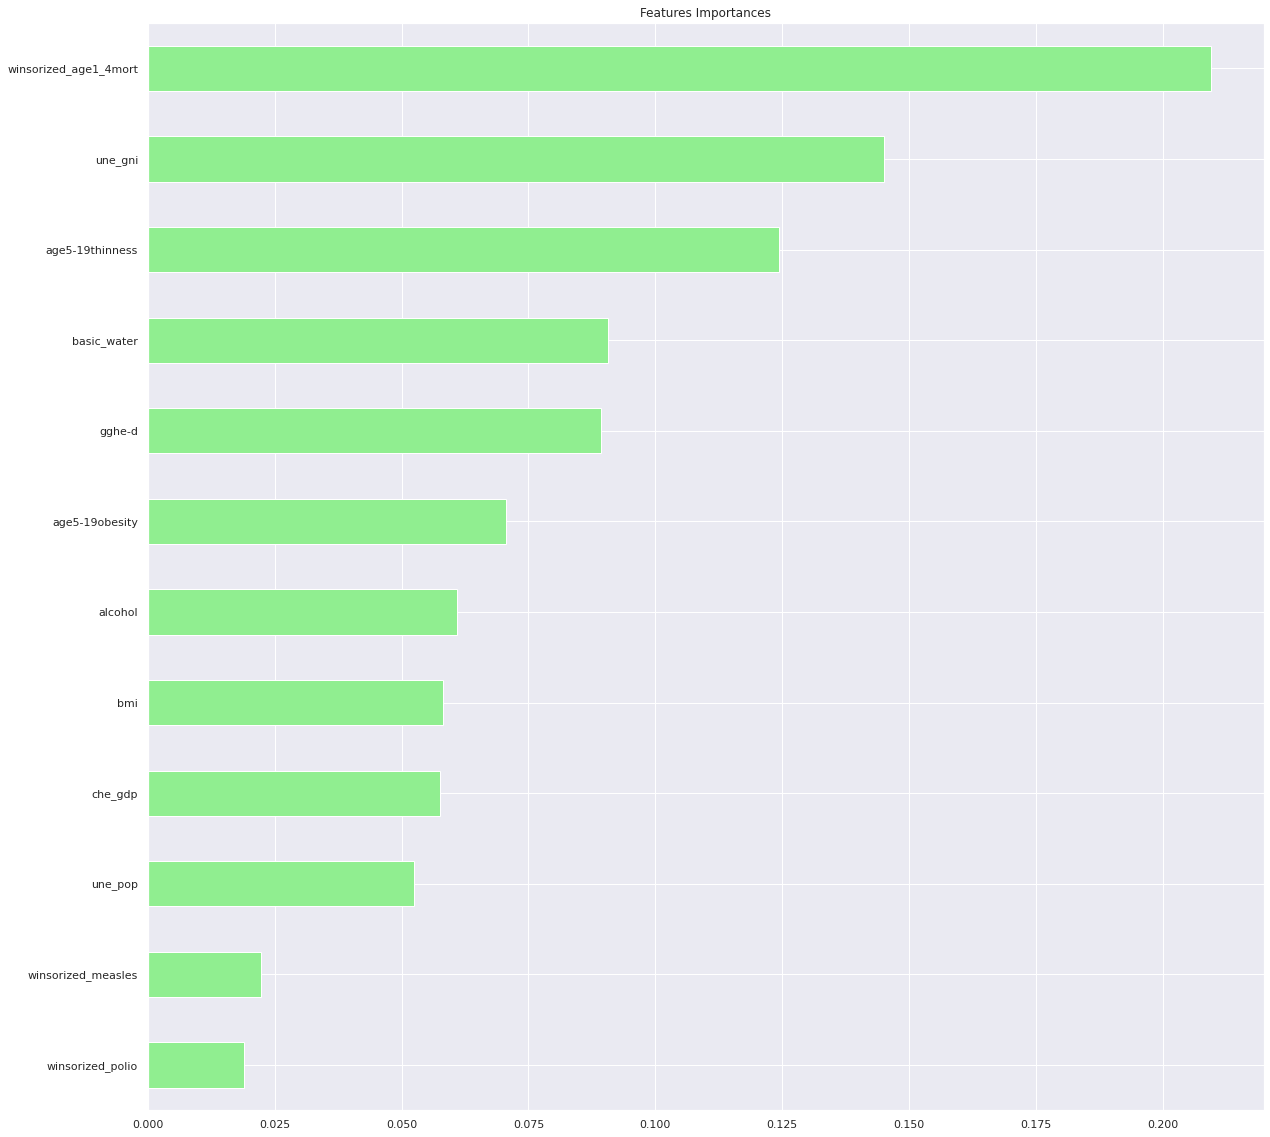

In [152]:
# Create a pd.Series of features importances
importances = pd.Series(data=classifier_rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()  

### RF's Hyperparameter

In [153]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30],
    'criterion' :['gini', 'entropy']
}
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=classifier_rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv=3,
                      verbose=1, n_jobs=-1)
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=20,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=42,
                                       

In [154]:
 grid_rf.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 500}

In [155]:
rfc1=RandomForestClassifier(random_state=42, criterion= 'entropy',
 max_features= 'log2',
 min_samples_leaf= 2,
 n_estimators= 500)

In [156]:
rfc1.fit(X_train,y_train)
y_predrf_tune = rfc1.predict(X_test)
 
# print classification report
print("Random Forest Classifier report Tune - \n", classification_report(y_test,y_predrf_tune))

# Evaluate the test set RMSE
rmse_test_tune = (MSE(y_test, y_predrf_tune))**(1/2)

# Print rmse_test
print('Test set RMSE of rf Tune: {:.2f}'.format(rmse_test_tune))

Random Forest Classifier report Tune - 
               precision    recall  f1-score   support

           2       1.00      0.67      0.80         6
           3       0.96      0.96      0.96       116
           4       0.96      0.98      0.97       131

    accuracy                           0.96       253
   macro avg       0.97      0.87      0.91       253
weighted avg       0.96      0.96      0.96       253

Test set RMSE of rf Tune: 0.20


In [157]:
# Print the confusion matrix of the Random Forest model
confusion_matrix(y_test,y_predrf_tune)
rfc1.score(X_test,y_test) 

0.9604743083003953

In [158]:
# Get the accuracy score of Random Forest model and print it
print("Accuracy of Random Forest Classifier: ",  rfc1.score(X_test,y_test) )

# print classification report
print("Classification report - \n", classification_report(y_test,y_predrf_tune))

tree_reg.score(X_test, y_test)
print("Test set score: {:.2f}".format(rfc1.score(X_test, y_test)))

# Compute test set accuracy  
acc = accuracy_score(y_test, y_predrf_tune)
print("Test set accuracy: {:.2f}".format(acc))

Accuracy of Random Forest Classifier:  0.9604743083003953
Classification report - 
               precision    recall  f1-score   support

           2       1.00      0.67      0.80         6
           3       0.96      0.96      0.96       116
           4       0.96      0.98      0.97       131

    accuracy                           0.96       253
   macro avg       0.97      0.87      0.91       253
weighted avg       0.96      0.96      0.96       253

Test set score: 0.96
Test set accuracy: 0.96


## **Coclusion:**

It’s remarkable that the studies/research and maintenance of obesity & alcohol have amplified, it’s still a pressing issue in the developing nations. A recommendation for the countries looking to surge their global life expectancy is to put emphasis on their resources, primarily on policies and guidelines that rise awareness and prevention on obesity & alcohol. Another way this can be derived is through governmental policy changes to provide education resources to bring awareness.

# **Insights**

<b>What was unique about the data?  Did you have to deal with imbalance? </b>
 


Time series data. 

We have faced issues with Nulls, Outliers, non-normalized data-handled them in the project, using substituting Country-group mean, imputing the nulls/nan, winsoring, Scalar and log transformation.


<b>What data cleaning did you do? Outlier treatment?  Imputation?</b>

We have dealt with Nulls, Outliers, non-normalized data-handled them in the project, using substituting Country-group mean, imputing the nulls/nan, winsoring, Scalar and log transformation.


<b>Did you create any new additional features / variables?</b>


We need to modify the predictor feature-life expectancy which is continous in nature, and inorder to fit to Classifier model, we have to created Life-expectancy-class/groups.


<b>What was the process you used for evaluation?  What was the best result?</b>

RSME-Root Mean sQured Score, Test Set scores and Model accuracy. Further we looked into Classification Report-Recall, Precision and accuracy.
We got best result for Random Forest with 0.97 accuracy.


<b>What were the problems you faced? How did you solve them?</b>

Problems with messy data, and continous nature of features. We resolved by imputation and cleaning the data.


<b>What future work would you like to do? </b>

We would like to Work on getting more clean data and extrapolating the data collection till the yaer 2021 or latest data available. Further would like to apply dimension reduction techniques like PCA.

<b>Instructions for individuals that may want to use your work</b>


Better the data, better the model building and accuracy; focus cleaning the data.
Enrich with further attributes like Countries Status attributes; this will give the better understanding on developed and developing countries. one of the resource we found is https://unctadstat.unctad.org/EN/Classifications.html. Implementing the Dimension Reduction Techniques like PCA. Further work on intelligently do {train:test} split in a manner,Train set, data pertaining to first 3 consecutive years, then 1 year of Test set; we will repeat this for next 4 iterations. Aka. Data for year 2000-2002 is Train data set, year of 2003 is Test data set;Data for year 2004-2006 is Train data set, year of 2007 is Test data set;Data for year 2008-2010 is Train data set, year of 2011 is Test data set;Data for year 2012-2015 is Train data set, year of  2016 is Test data set.



 

## **References**

https://ourworldindata.org/life-expectancy

https://population.un.org/wpp/Download/Standard/Mortality/

https://unctadstat.unctad.org/EN/Classifications.html

https://unctadstat.unctad.org/EN/Classifications.html

https://s3.amazonaws.com/assets.datacamp.com/production/course_6280/slides/chapter5.pdf

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset/51071037